In [28]:
import azureml.dataprep as dprep
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
clicks_df = pd.read_csv("../clicks_latest_raw.csv")

In [30]:
clicks_df.head()

,client_id,session_id,page,date,time,timeframe,reg_no,make,model,fuel,colour,body,trasmission
0,1.000010e+09,1552164105110.tu20xgmk,/search/bmw/1-series/manual-diesel-white-hatch...,2019-03-09,20:41,1552164060,vk65kzw,bmw,1-series,diesel,white,hatchback,manual
1,1.000020e+09,1551548659573.la303ik,/search/alfa-romeo/giulietta/manual-diesel-bla...,2019-03-02,17:43,1551548580,st63cxf,alfa-romeo,giulietta,diesel,black,hatchback,manual
2,1.000020e+09,1551548659573.la303ik,/search/alfa-romeo/giulietta/manual-diesel-bla...,2019-03-02,17:44,1551548640,st63cxf,alfa-romeo,giulietta,diesel,black,hatchback,manual
3,1.000024e+08,1553512749300.yqecw34,/search/mini/countryman/automatic-diesel-silve...,2019-03-25,11:19,1553512740,wr14uju,mini,countryman,diesel,silver,hatchback,automatic
4,1.000026e+09,1551459467897.sc8ayc9g,/search/renault/megane/manual-diesel-orange-co...,2019-03-01,16:57,1551459420,hn09guj,renault,megane,diesel,orange,coupe,manual


In [31]:
len(clicks_df) #Total Clicks

1420006

In [32]:
clicks_df.isna().sum() #All Null Values

client_id           0
session_id          0
page                0
date                0
time                0
timeframe           0
reg_no         306489
make           276658
model          276145
fuel           306489
colour         306489
body           306489
trasmission    305976
dtype: int64

In [33]:
clicks_df = clicks_df.dropna()

In [34]:
clicks_df.isna().sum() #All Null Values

client_id      0
session_id     0
page           0
date           0
time           0
timeframe      0
reg_no         0
make           0
model          0
fuel           0
colour         0
body           0
trasmission    0
dtype: int64

In [35]:
print(len(clicks_df)) #After removing null values

1113517


In [36]:
max_time = clicks_df['timeframe'].max()

In [37]:
split_day = max_time - 86400 * 1

In [38]:
# Make train and test data have the same vehicles

test_df = clicks_df.loc[clicks_df['timeframe'] >= split_day]

test_df['reg_no'].nunique() #No. of unique vehicles in test data

4369

In [39]:
train_df = clicks_df.loc[clicks_df['timeframe'] < split_day]
train_df['reg_no'].nunique() #No. of unique vehicles in train data

9355

In [40]:
#Filter both train and test data - remove vehicles in train data that are not in test data

train_df = train_df.loc[train_df['reg_no'].isin(test_df['reg_no'])]
train_df['reg_no'].nunique()

4274

In [42]:
clicks_df = pd.concat([train_df, test_df]) #Use new clicks df
print(len(clicks_df))

624051


In [43]:
cols = ["session_id","reg_no"]
clicks_df = clicks_df.loc[(clicks_df[cols].shift() != clicks_df[cols]).any(axis=1)] # Remove Consecutive same clicks in session
print(len(clicks_df)) #After removing consecutive duplicates
clicks_df.head()

527018


,client_id,session_id,page,date,time,timeframe,reg_no,make,model,fuel,colour,body,trasmission
3,1.000024e+08,1553512749300.yqecw34,/search/mini/countryman/automatic-diesel-silve...,2019-03-25,11:19,1553512740,wr14uju,mini,countryman,diesel,silver,hatchback,automatic
4,1.000026e+09,1551459467897.sc8ayc9g,/search/renault/megane/manual-diesel-orange-co...,2019-03-01,16:57,1551459420,hn09guj,renault,megane,diesel,orange,coupe,manual
12,1.000045e+09,1552588132414.0bchbjtjq,/search/mercedes-benz/slk/automatic-petrol-bla...,2019-03-14,18:28,1552588080,wf58kyv,mercedes-benz,slk,petrol,black,roadster,automatic
13,1.000045e+09,1552591980922.n0sz1ihr,/search/mercedes-benz/slk/automatic-petrol-whi...,2019-03-14,19:33,1552591980,nj10nxy,mercedes-benz,slk,petrol,white,roadster,automatic
14,1.000045e+09,1552679033386.25c5ob14,/search/mercedes-benz/slk/automatic-petrol-whi...,2019-03-15,19:43,1552678980,nj10nxy,mercedes-benz,slk,petrol,white,roadster,automatic


In [44]:
clicks_df["reg_no"].nunique() #Unique Cars Seen

4369

In [45]:
clicks_df["session_id"].nunique() #Unique Sessions

245225

In [46]:
clicks_df["client_id"].nunique() #Unique Users

134741

In [47]:
grouped = clicks_df.groupby('session_id')['page'].agg(["count"])
print(grouped.head())

                         count
session_id                    
1530036862520.8ld4cmufc      1
1530037030603.3idh59yef      1
1530038310374.n6t4wrutf      1
1530038945304.k6me1ecja      1
1530039224305.k12gyax0g      1


In [48]:
filtered = grouped.query('count>1 and count <40')

x = len(filtered)

print(f" Sessions with greater than 1 click and less than 40 clicks = {x}")
print(f" Sessions with only 1 click or more than 40 = {len(grouped)-x}")

 Sessions with greater than 1 click and less than 40 clicks = 102413
 Sessions with only 1 click or more than 40 = 142812


In [49]:
total_clicks = filtered['count'].sum()
print(f" Total clicks after filtering = {total_clicks}")

 Total clicks after filtering = 380998


In [50]:
average_clicks = filtered['count'].mean()
print(f" Average clicks per session = {average_clicks}")

 Average clicks per session = 3.72021130129964


In [51]:
max_clicks = filtered['count'].max()
min_clicks = filtered['count'].min()
print(f"Max clicks per session = {max_clicks}")
print(f"Min clicks per session = {min_clicks}")

Max clicks per session = 39
Min clicks per session = 2


In [52]:
filtered.sort_values(by='count', ascending=False).head()

,count
session_id,
1554758881821.z7rspmb,39
1554151325136.2tqag6h5,39
1553624131489.85k2pe7m,39
1554672858561.10l3tja,39
1553990209207.wq60qlcc,39


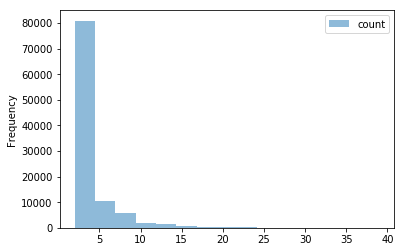

In [53]:
filtered.plot.hist(bins=15, alpha=0.5) #Clicks per session frequency

In [54]:
clean_df = pd.merge(clicks_df, filtered, on='session_id')
clean_df.head()

,client_id,session_id,page,date,time,timeframe,reg_no,make,model,fuel,colour,body,trasmission,count
0,1.000059e+09,1551464297765.jsxg0dp8,/search/bmw/4-series/manual-diesel-grey-hatchb...,2019-03-01,18:17,1551464220,fv17vfy,bmw,4-series,diesel,grey,hatchback,manual,2
1,1.000059e+09,1551464297765.jsxg0dp8,/search/jaguar/xf/automatic-petrol-grey-saloon...,2019-03-01,18:18,1551464280,na17wjf,jaguar,xf,petrol,grey,saloon,automatic,2
2,1.000059e+09,1551473993887.u4ef7aq,/search/bmw/4-series/manual-diesel-grey-hatchb...,2019-03-01,20:47,1551473220,fv17vfy,bmw,4-series,diesel,grey,hatchback,manual,3
3,1.000059e+09,1551473993887.u4ef7aq,/search/bmw/4-series/manual-diesel-grey-hatchb...,2019-03-01,20:47,1551473220,gu66ngy,bmw,4-series,diesel,grey,hatchback,manual,3
4,1.000059e+09,1551473993887.u4ef7aq,/search/jaguar/xf/automatic-diesel-white-saloo...,2019-03-01,20:52,1551473520,sv65nzn,jaguar,xf,diesel,white,saloon,automatic,3


In [55]:
clean_df.drop('count', axis=1, inplace=True)
print(len(clean_df))

380998


In [56]:
clean_df.to_csv("../clicks_clean_latest.csv", index=False) #Save the cleaned data